# Pymaceuticals Inc.
---

### Analysis

- Of the 4 drugs that were closely monitored, Capomulin and Ramicane were the most effective in reducing tumor size. Further tests and studies should be done on these two treatments to see if more progress can be made.
- There is a correlation between average tumor size and average weight of the mice; the larger the mouse, the larger the tumor.
- There was one outlier mice that was treated with Infubinol; this mouse should also be looked at closely to see what outside factors may have been effective in reducing its tumor size.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#data = [mouse_metadata, study_results]
df = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
df = df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 
                    'Metastatic Sites']]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_unique = df['Mouse ID'].value_counts()
mice_count = len(mice_unique)
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = df.loc[df["Mouse ID"] == "g989", :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_unique = clean_df['Mouse ID'].value_counts()
mice_count_clean = len(mice_unique)
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

regimen_summary = pd.DataFrame ({
    "Mean Tumor Volume": regimen_mean, 
    "Median Tumor Volume":regimen_median, 
    "Tumor Volume Variance":regimen_variance, 
    "Tumor Volume Std. Dev.": regimen_std, 
    "Tumor Volume Std. Err.": regimen_sem
})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

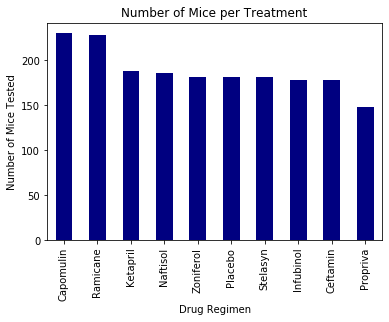

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_chart = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count_chart.plot.bar(color='navy')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

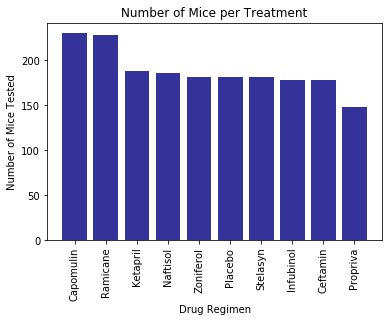

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_chart.index.values
y_axis = mice_count_chart.values

plt.bar(x_axis, y_axis, color='navy', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

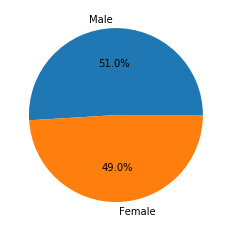

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.pie(clean_df['Sex'].value_counts(), labels=['Male', 'Female'], autopct="%1.1f%%")
plt.show()
plt.savefig("Pie_Chart")

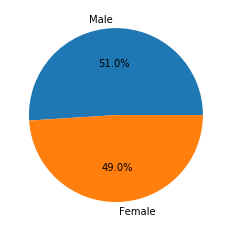

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = [51, 49]
labels = ["Male", "Female"]
autopct = "%1.1f%%"

plt.pie(gender, labels=labels, autopct=autopct)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ftv_df = pd.merge(clean_df, max_timepoint_df, on=['Mouse ID', 'Timepoint'], how="right")
ftv_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_final_vol = []
ram_final_vol = []
inf_final_vol = []
cef_final_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Done separately, see input below
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in ftv_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        cap_final_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ram_final_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        inf_final_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        cef_final_vol.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": cap_final_vol,
                       treatments[1]: ram_final_vol,
                       treatments[2]: inf_final_vol,
                       treatments[3]: cef_final_vol
                       })

drug_df
    
    # Determine outliers using upper and lower bounds
        # Done separately, see input below

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
cap_quartiles = drug_df[treatments[0]].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lowerb = cap_lowerq - (1.5*cap_iqr)
cap_upperb = cap_upperq + (1.5*cap_iqr)
cap_max = drug_df["Capomulin"].max()
cap_min = drug_df["Capomulin"].min()
if cap_max > cap_upperb or cap_min < cap_lowerb:
    print(f"Capomulin outliers are {cap_max} and {cap_min}")
else:
   print("There are no outliers for Capomulin")

ram_quartiles = drug_df[treatments[1]].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lowerb = ram_lowerq - (1.5*cap_iqr)
ram_upperb = ram_upperq + (1.5*cap_iqr)
ram_max = drug_df["Ramicane"].max()
ram_min = drug_df["Ramicane"].min()
if ram_max > ram_upperb or ram_min < ram_lowerb:
    print(f"Ramicane outliers are {ram_max} and {ram_min}")
else:
   print("There are no outliers for Ramicane")

inf_quartiles = drug_df[treatments[2]].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lowerb = inf_lowerq - (1.5*cap_iqr)
inf_upperb = inf_upperq + (1.5*cap_iqr)
inf_max = drug_df["Infubinol"].max()
inf_min = drug_df["Infubinol"].min()
if inf_max > inf_upperb or inf_min < inf_lowerb:
    print(f"There are outliers for Infubinol: {round(inf_min, 6)}")
    
else:
   print("There are no outliers for Infubinol")

cef_quartiles = drug_df[treatments[3]].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lowerb = inf_lowerq - (1.5*cap_iqr)
cef_upperb = inf_upperq + (1.5*cap_iqr)
cef_max = drug_df["Ceftamin"].max()
cef_min = drug_df["Ceftamin"].min()
if cef_max > cef_upperb or cef_min < cef_lowerb:
    print("There are outliers for Ceftamin")
else:
   print("There are no outliers for Ceftamin")


There are no outliers for Capomulin
There are no outliers for Ramicane
There are outliers for Infubinol: 36.321346
There are no outliers for Ceftamin


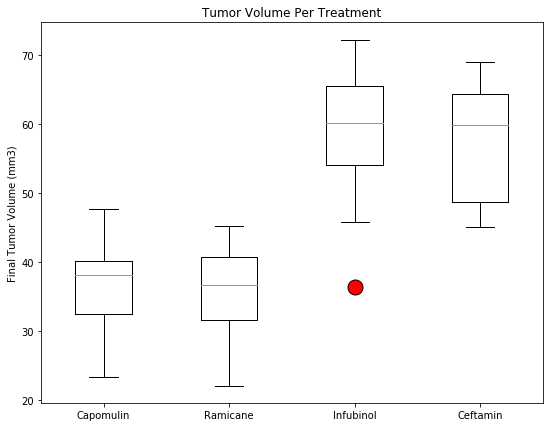

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Got the "flierprops" code to colorize the outlier from: "https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib"
red_dot = dict(markerfacecolor = "red", markersize=15)
plt.figure(figsize=(9,7))
plt.boxplot([cap_final_vol, ram_final_vol, inf_final_vol, cef_final_vol],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], flierprops=red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Per Treatment')


plt.show()

## Line and Scatter Plots

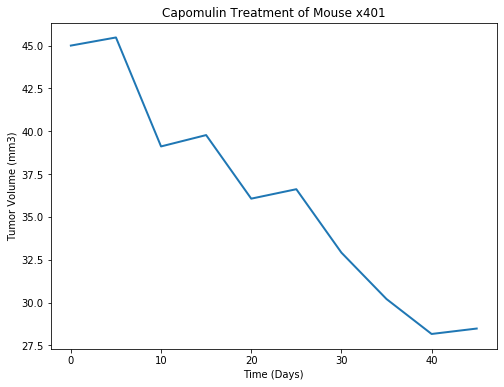

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse1 = clean_df.loc[clean_df['Mouse ID'] == "x401"]
x_axis = mouse1["Timepoint"]
y_axis = mouse1["Tumor Volume (mm3)"]
plt.figure(figsize=(8,6))
plt.plot(x_axis, y_axis, linewidth=2, markersize=12)
plt.title("Capomulin Treatment of Mouse x401")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
plt.savefig('Linechart_x401')

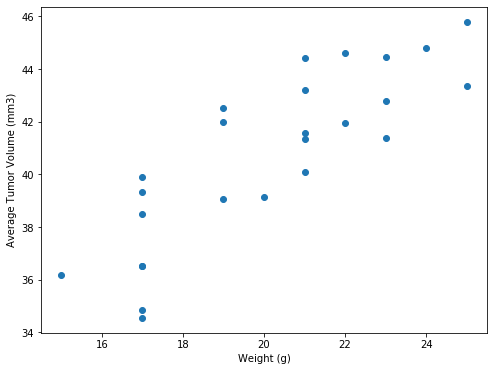

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mice = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_avg = cap_mice.groupby(['Mouse ID']).mean()
plt.figure(figsize=(8,6))
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()
plt.savefig('Scatterplot_Capomulin')

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
linreg=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
linreg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [20]:
#set slope and intercept variables
slope = 0.9544396890241045
intercept = 21.552160532685015

The correlation between mouse weight and average tumor volume is 0.84


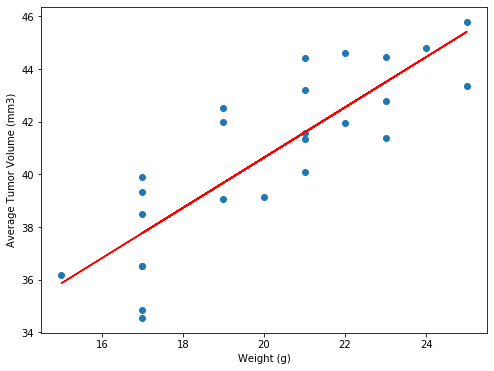

<Figure size 432x288 with 0 Axes>

In [21]:
#create line from slope and intercept
line = slope*(cap_avg['Weight (g)'])+intercept
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
plt.figure(figsize=(8,6))
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], line, 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()
plt.savefig("Scatterplot_Correlation")
